In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('train.csv')
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [4]:
df.shape

(550068, 12)

In [5]:
df.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

In [6]:
#Finding Duplicated value
df.duplicated().sum()

0

C:\Users\hDibie\AppData\Local\Temp\ipykernel_14120\70320809.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()
C:\Users\hDibie\AppData\Local\Temp\ipykernel_14120\70320809.py:8: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


<Axes: >

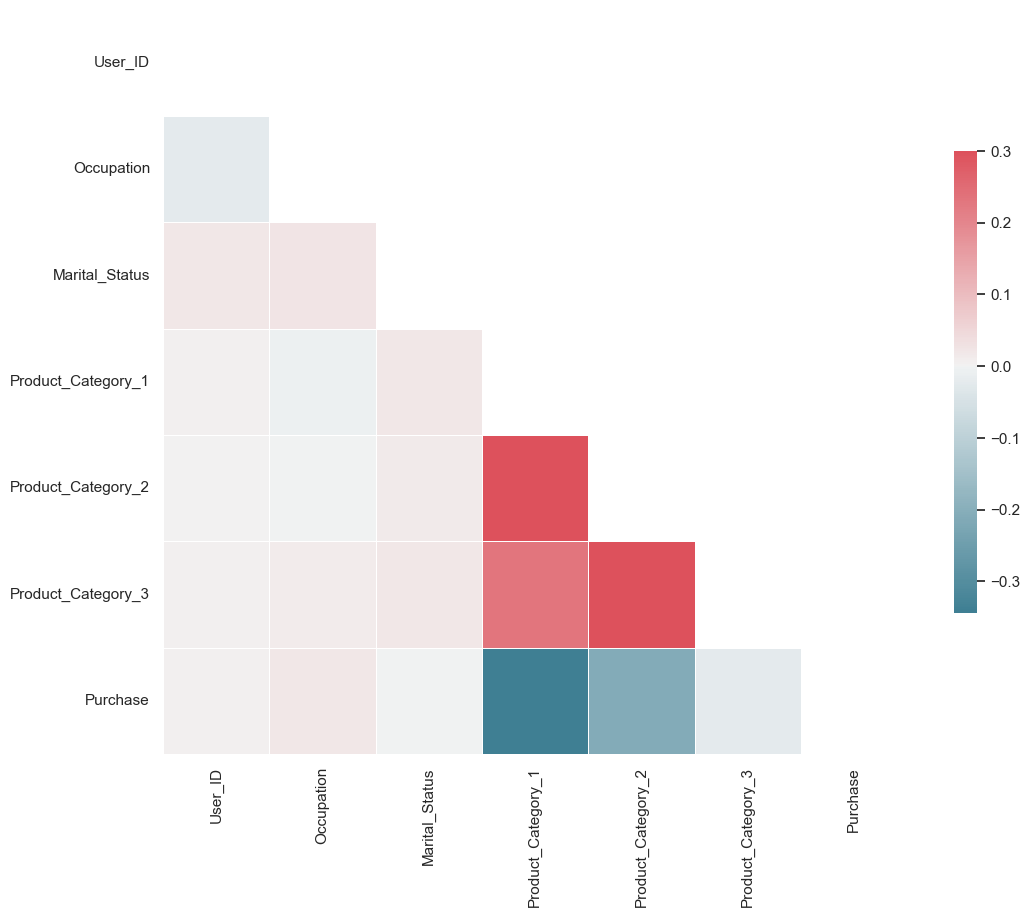

In [7]:
#Correlation
sns.set(style="white")

# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 12))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [8]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [9]:
# Step 1: Handle Missing Values
df['Product_Category_2'].fillna(df['Product_Category_2'].mean(), inplace=True)
df['Product_Category_3'].fillna(df['Product_Category_3'].mean(), inplace=True)

# Step 2: Handle Categorical Variables
df = pd.get_dummies(df, columns=['Gender', 'Age', 'City_Category'])
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].str.replace('+', '').astype(int)

# Step 4: Data Type Conversion (if necessary)

# Step 5: Data Normalization or Scaling (if necessary)

# Step 6: Handle Outliers (if necessary)

# Print the cleaned dataset
print(df.head())

   User_ID Product_ID  Occupation  Stay_In_Current_City_Years  Marital_Status  \
0  1000001  P00069042          10                           2               0   
1  1000001  P00248942          10                           2               0   
2  1000001  P00087842          10                           2               0   
3  1000001  P00085442          10                           2               0   
4  1000002  P00285442          16                           4               0   

   Product_Category_1  Product_Category_2  Product_Category_3  Purchase  \
0                   3            9.842329           12.668243      8370   
1                   1            6.000000           14.000000     15200   
2                  12            9.842329           12.668243      1422   
3                  12           14.000000           12.668243      1057   
4                   8            9.842329           12.668243      7969   

   Gender_F  ...  Age_0-17  Age_18-25  Age_26-35  Age_36-45  A

C:\Users\hDibie\AppData\Local\Temp\ipykernel_14120\2554981216.py:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].str.replace('+', '').astype(int)


In [10]:
df.isna().sum()

User_ID                       0
Product_ID                    0
Occupation                    0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
Gender_F                      0
Gender_M                      0
Age_0-17                      0
Age_18-25                     0
Age_26-35                     0
Age_36-45                     0
Age_46-50                     0
Age_51-55                     0
Age_55+                       0
City_Category_A               0
City_Category_B               0
City_Category_C               0
dtype: int64

In [11]:
df.head()

,User_ID,Product_ID,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Gender_F,...,Age_0-17,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+,City_Category_A,City_Category_B,City_Category_C
0,1000001,P00069042,10,2,0,3,9.842329,12.668243,8370,1,...,1,0,0,0,0,0,0,1,0,0
1,1000001,P00248942,10,2,0,1,6.000000,14.000000,15200,1,...,1,0,0,0,0,0,0,1,0,0
2,1000001,P00087842,10,2,0,12,9.842329,12.668243,1422,1,...,1,0,0,0,0,0,0,1,0,0
3,1000001,P00085442,10,2,0,12,14.000000,12.668243,1057,1,...,1,0,0,0,0,0,0,1,0,0
4,1000002,P00285442,16,4,0,8,9.842329,12.668243,7969,0,...,0,0,0,0,0,0,1,0,0,1


            User_ID     Occupation  Stay_In_Current_City_Years  \
count  5.500680e+05  550068.000000               550068.000000   
mean   1.003029e+06       8.076707                    1.858418   
std    1.727592e+03       6.522660                    1.289443   
min    1.000001e+06       0.000000                    0.000000   
25%    1.001516e+06       2.000000                    1.000000   
50%    1.003077e+06       7.000000                    2.000000   
75%    1.004478e+06      14.000000                    3.000000   
max    1.006040e+06      20.000000                    4.000000   

       Marital_Status  Product_Category_1  Product_Category_2  \
count   550068.000000       550068.000000       550068.000000   
mean         0.409653            5.404270            9.842329   
std          0.491770            3.936211            4.207852   
min          0.000000            1.000000            2.000000   
25%          0.000000            1.000000            8.000000   
50%          0.

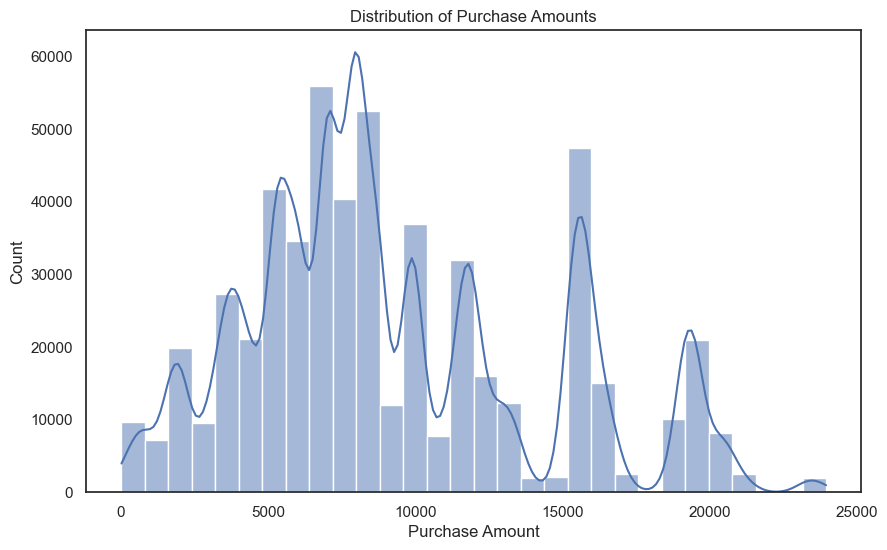

In [12]:
# Summary statistics
print(df.describe())

# Distribution of purchase amounts
plt.figure(figsize=(10, 6))
sns.histplot(df['Purchase'], bins=30, kde=True)
plt.xlabel('Purchase Amount')
plt.ylabel('Count')
plt.title('Distribution of Purchase Amounts')
plt.show()



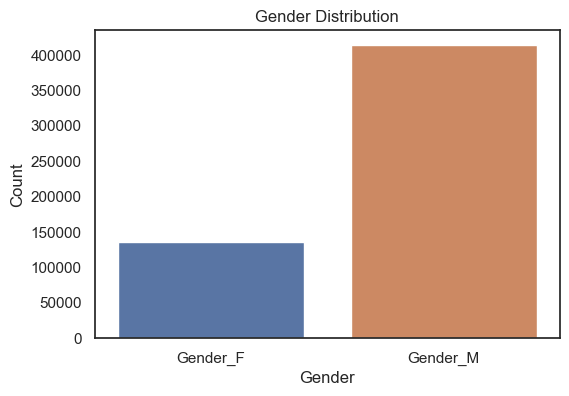

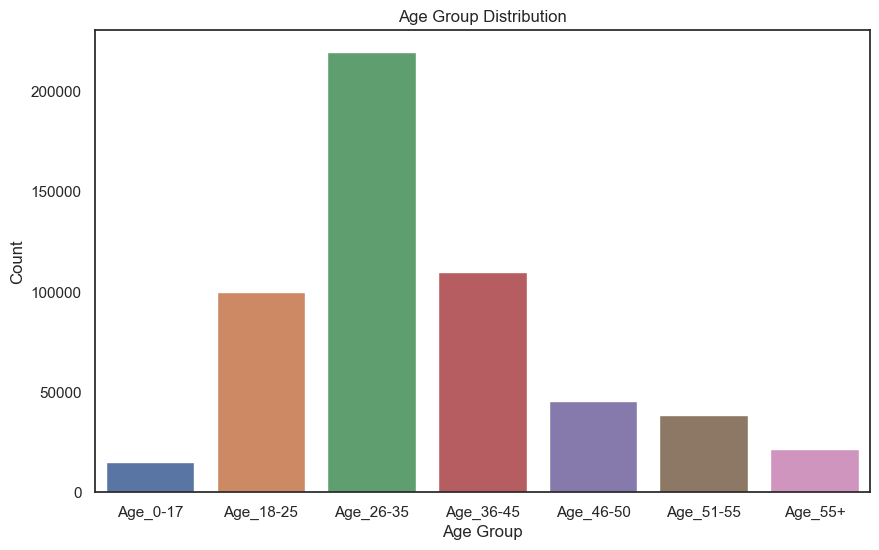

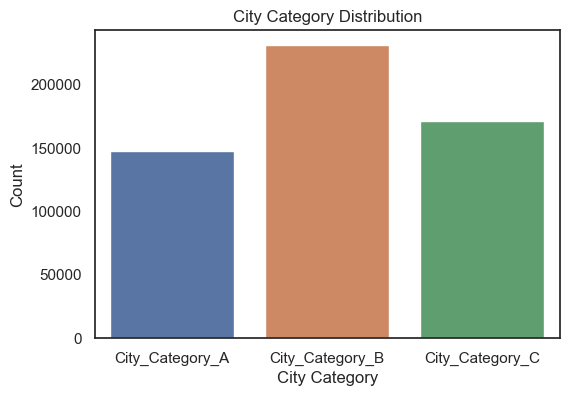

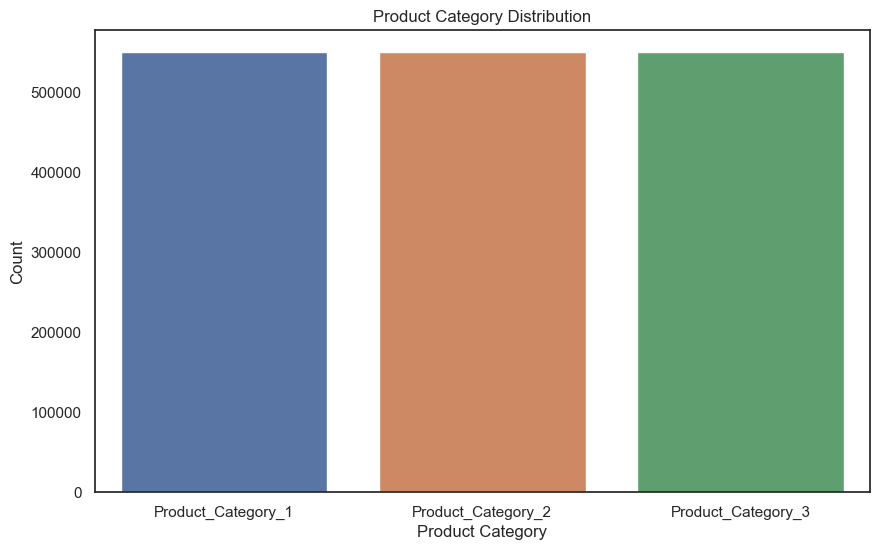

In [13]:
# Gender distribution
gender_counts = df[['Gender_F', 'Gender_M']].sum()
plt.figure(figsize=(6, 4))
sns.barplot(x=gender_counts.index, y=gender_counts.values)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution')
plt.show()

# Age group distribution
age_groups = ['Age_0-17', 'Age_18-25', 'Age_26-35', 'Age_36-45', 'Age_46-50', 'Age_51-55', 'Age_55+']
age_group_counts = df[age_groups].sum()
plt.figure(figsize=(10, 6))
sns.barplot(x=age_group_counts.index, y=age_group_counts.values)
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Age Group Distribution')
plt.show()

# City category distribution
city_categories = ['City_Category_A', 'City_Category_B', 'City_Category_C']
city_category_counts = df[city_categories].sum()
plt.figure(figsize=(6, 4))
sns.barplot(x=city_category_counts.index, y=city_category_counts.values)
plt.xlabel('City Category')
plt.ylabel('Count')
plt.title('City Category Distribution')
plt.show()

# Product category distribution
product_categories = ['Product_Category_1', 'Product_Category_2', 'Product_Category_3']
product_category_counts = df[product_categories].apply(lambda x: x.value_counts().sum())
plt.figure(figsize=(10, 6))
sns.barplot(x=product_category_counts.index, y=product_category_counts.values)
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.title('Product Category Distribution')
plt.show()

# Customer Lifetime Value Analysis

In [14]:
# Calculate the total purchase amount for each customer
clv_data = df.groupby('User_ID')['Purchase'].sum()

# Calculate the number of purchases for each customer
customer_lifespan = df.groupby('User_ID')['Purchase'].count()

# Calculate the average purchase value for each customer
average_purchase_value = clv_data / customer_lifespan

# Calculate the average customer lifespan
average_customer_lifespan = customer_lifespan.mean()

# Calculate the CLV for each customer
clv = average_purchase_value * average_customer_lifespan

# Print the CLV values
print(clv)

User_ID
1000001    8.913057e+05
1000002    9.828215e+05
1000003    1.099998e+06
1000004    1.377057e+06
1000005    7.232113e+05
               ...     
1006036    7.477316e+05
1006037    8.568531e+05
1006038    7.005718e+05
1006039    7.448733e+05
1006040    8.576424e+05
Name: Purchase, Length: 5891, dtype: float64


In [17]:
pip install mlxtend

     ---------------------------------------- 1.4/1.4 MB 1.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [18]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

In [19]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# Select the relevant columns for association analysis
product_data = df[['User_ID', 'Product_ID']]

# Group the products by User_ID
transactions = product_data.groupby('User_ID')['Product_ID'].apply(list)

# Convert the transactions to a transaction matrix
te = TransactionEncoder()
te_ary = te.fit_transform(transactions)
encoded_df = pd.DataFrame(te_ary, columns=te.columns_)

# Apply Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(encoded_df, min_support=0.1, use_colnames=True)

# Generate association rules
association_rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)

# Print the association rules
print(association_rules)

Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, leverage, conviction, zhangs_metric]
Index: []
